# Introduction
### Background
According to the National Cancer Institute, a stroke occurs when brain tissue is damaged due to a loss of blood flow to parts of the brain [1]. Worldwide, strokes are responsible for an annual mortality rate of 5.5 million. This makes it the 2nd leading cause of death. After the age of 55, the risk of a stroke doubles every decade, making age the strongest determinant. The leading risk factor of stroke is hypertension in both developing and developed nations [2].

### Question
Can we accurately predict the likelihood of a stroke in a patient given a set of clinical features?

### Dataset description
The dataset that will be used is the Stroke Prediction Dataset, available via [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), it consists of 5110 observation with 12 different variables including gender, age, hypertension, heart disease, marriage status, type of work (self-employed/private/children/government/never worked), residence (rural or urban), average glucose levels, BMI, smoking status, and whether the patient has ever had a stroke.

# Methodology
To conduct our data analysis, we will begin by demonstrating that the dataset can be read within R. We will next clean/wrangle our data into a tidy format by removing any of the variables we decided below. We will then analyze our data to better educate ourselves of the different trends within our data sets. Then we will split our data using part of it to train our data, to evaluate the accuracy and to improve our model.


We will be performing a classification analysis to predict if a patient will have a stroke using these predictors:
| Variable               | Description                                                                  |
|------------------------|------------------------------------------------------------------------------|
| Gender                 | Whether the patient is a Male or Female                                      |
| Age                    | Age of the patient                                                           |
| Hypertension           | Whether the patient has been diagnosed with hypertension                     |
| Heart disease          | Whether the patient has been diagnosed with heart disease                    |
| Residence              | Whether the patient lives in a rural or urban area                           |
| Average glucose levels | Average glucose level in blood [mg/dL]                                       |
| BMI                    | Body mass index                                                              |
| Smoking status         | Whether the patient is a former smoker, has never smoked or currently smokes |
| Stroke                 | Whether the patient has had a stroke                                         |

**NOTE**: The above markdown table does not render when saved as an `.html` file, so we are writing it out here for clarity:
- **Gender**: Whether the patient is a Male or Female
- **Age**: Age of the patient
- **Hypertension**: Whether the patient has been diagnosed with hypertension
- **Heart disease**: Whether the patient has been diagnosed with heart disease
- **Residence**: Whether the patient lives in a rural or urban area
- **Average glucose levels**: Average glucose level in blood [mg/dL]                                       
- **BMI**: Body mass index
- **Smoking status**: Whether the patient is a former smoker, has never smoked or currently smokes
- **Stroke**: Whether the patient has had a stroke


We have opted to not use the following variables/column in our analysis:
- `id`: This is the ID of the patient in the dataset and does not contribute to stroke prediction
- `ever_married`: This boolean column describes whether the individual has ever been married. We do not feel as though this is a strong indicator of stroke and/or general health outcomes.
- `work_type`: This column held the following possible values: `{Private, Self-employed, Government job, Never worked, Children}`. We did not feel as though the level at which this data was collected would contribute to predicting stroke - perhaps if this was separated between jobs that require manual labor (“blue-collar” jobs) vs. desk jobs (“white-collar” jobs) it could have been more useful.

## Possible visualizations
- **Bar charts** can be used to visualize the distribution of gender, hypertension, heart disease and other among stroke and non-stroke groups
- **Scatter plots** can be used to visualize relationships between age, average glucose levels, or BMI, with stroke occurrence as the color of the point
- **Heatmaps** can be used in combination with scatter plots to better visualize the different weights points can have within our predictive model

# Expected outcomes and significance
### What do we expect to find
There is quite a bit of research being done on the risk factors of stroke; however, there is not a consensus on this. For example, (this study)[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2734855/] states that “smoking amplifies the positive association between BMI and CHD but not stroke” [3] conversely there are others studies who indicate that smoking “demonstrate[s] a strong association between smoking and stroke risk, with current smokers having at least a two- to fourfold increased risk of stroke” [4]. On the other hand, the notion of BMI being a good predictor of health is falling out of favor as of late. This is due to a conflict in findings which tell us that all cause mortality and BMI are strongly related [5], but higher levels of lean mass, which BMI fails to distinguish with fat mass [6], is inversely associated with mortality [7, 8]. We hope to discover a relationship between these factors (amongst others) on the risk of stroke in this dataset.

### Impacts of our findings
- **Early Intervention**: By being able to predict stroke risks, healthcare providers can better identify individuals who are at a higher risk of stroke before the deadly event happens. Early identification has the potential to significantly reduce the occurrence of strokes and further complication by allowing individuals to develop personalized treatment plans with medical professionals to improve their quality of life to minimize the chance.
- **Education + Awareness**: Our findings could be used to educate future generations of the risk factors that can lead to having a stroke. This can encourage them to live a healthier and positive lifestyle. Provides individuals, who may have risk factors that are genetic and not lifestyle, a better understanding of their risks. This will also benefit policy making, for example if the model identifies smoking as a strong predictor of a stroke, people in public health can prioritize initiatives that better control smoking.

### What future questions could this lead to
One key area for future exploration is the generalizability of the model in real-word scenarios. This is specifically important in the case if insurance companies/governments decide to use this technology as if the model isn’t generalizable it may lead to unfair outcomes and discriminate or have biases based on the original sample demographic it was trained with. As refined and well-trained the model can be, it's crucial to consider the potential exception and variation that arise due to the oddities of human biology and environmental factors. Therefore this research can lead to future research focusing on assessing the models ability across different populations in the world and healthcare systems.

# References
- [1] https://www.cancer.gov/publications/dictionaries/cancer-terms/def/stroke
- [2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6288566/
- [3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2734855/
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2928253/
- [5] https://www.thelancet.com/journals/landia/article/PIIS2213-8587(18)30288-2/fulltext
- [6] https://www.sciencedirect.com/science/article/pii/S2405525521000017
- [7] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6348595/
- [8] https://www.medicalnewstoday.com/articles/265215

# Preliminary exploratory data analysis
### Loading Data and Dependencies

In [5]:
#Import all dependencies
library(tidyverse)
library(tidymodels)
library(repr)

In [6]:
#Random Seed
set.seed(894235)

In [7]:
#Create data dir and download csv into it
url <- "https://raw.githubusercontent.com/21chanas3/dsci100-group73/c9c58b88eca13be20286f8bf70dce4668b878247/data/healthcare-dataset-stroke-data.csv"
if (!dir.exists("data")) {
    dir.create("data")
}
download.file(url, "data/stroke.csv")

In [8]:
stroke <- read_csv("data/stroke.csv")

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Cleaning and Wrangling

In [9]:
#Rename columns to all lowercase
stroke_colnames <- stroke |> colnames() |> make.names() |> tolower()
colnames(stroke) <- stroke_colnames

In [10]:
#Convert Unknown's to NA
stroke <- stroke |> na_if("Unknown")

#Convert categorical vars to factors
stroke <- stroke |> mutate(gender = as_factor(gender), 
                 work_type = as_factor(work_type), 
                 residence_type = as_factor(residence_type), 
                 smoking_status = as_factor(smoking_status),
                 hypertension = as_factor(hypertension),
                 ever_married = as_factor(ever_married),
                 heart_disease = as_factor(heart_disease),
                 stroke = as_factor(stroke))

#Rename factor levels to nicer names
stroke$hypertension <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$heart_disease <- recode_factor(stroke$heart_disease, "0" = "No", "1" = "Yes")
stroke$stroke <- recode_factor(stroke$stroke, "0" = "No", "1" = "Yes")
stroke$work_type <- recode_factor(stroke$work_type, "Govt_job" = "Government", "Never_worked" = "Never Worked")
stroke$smoking_status <- recode_factor(stroke$smoking_status, "formerly smoked" = "Formerly", "never smoked" = "Never", "smokes" = "Smokes")

In [11]:
#For some reason bmi is of type char probably because of N/A, converting to double here
stroke <- stroke |> mutate(bmi = as.numeric(as.character(bmi)))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [12]:
#Dropping NA
stroke <- stroke |> drop_na()

In [13]:
#Creating test/train split here
stroke_split <- initial_split(stroke, prop = 0.8, strata = stroke)
stroke_training <- training(stroke_split)
stroke_testing <- testing(stroke_split)

In [14]:
#Getting summary stats for categorical vars here
stroke_married_stats <- stroke_training |> group_by(ever_married) |> summarise(value = n()) |> 
    rename("key" = "ever_married") |> mutate(column_name = "ever_married")
stroke_work_stats <- stroke_training |> group_by(work_type) |> summarise(value = n()) |> 
    rename("key" = "work_type") |> mutate(column_name = "work_type")
stroke_gender_stats <- stroke_training |> group_by(gender) |> summarise(value = n()) |> 
    rename("key" = "gender") |> mutate(column_name = "gender")
stroke_residence_type_stats <- stroke_training |> group_by(residence_type) |> summarise(value = n()) |> 
    rename("key" = "residence_type") |> mutate(column_name = "residence_type")
stroke_smoking_status_stats <- stroke_training |> group_by(smoking_status) |> summarise(value = n()) |> 
    rename("key" = "smoking_status") |> mutate(column_name = "smoking_status")
stroke_hypertension_stats <- stroke_training |> group_by(hypertension) |> summarise(value = n()) |> mutate(hypertension = as.character(hypertension)) |> 
    rename("key" = "hypertension") |> mutate(column_name = "hypertension") 
stroke_heart_disease_stats <- stroke_training |> group_by(heart_disease) |> summarise(value = n()) |> mutate(heart_disease = as.character(heart_disease)) |> 
    rename("key" = "heart_disease") |> mutate(column_name = "heart_disease")
stroke_stroke_stats <- stroke_training |> group_by(stroke) |> summarise(value = n()) |> mutate(stroke = as.character(stroke)) |> 
    rename("key" = "stroke") |> mutate(column_name = "stroke") 

In [15]:
#Getting summary stats for continuous vars here
stroke_numeric_cols_summary <- stroke |> 
    select(avg_glucose_level, bmi, age) |> 
    map_dfc(mean, na.rm = TRUE)

In [16]:
#Combining both summary stats
stroke_summary_stats <- stroke_numeric_cols_summary |> pivot_longer(age:avg_glucose_level, names_to = "column_name", values_to = "value")
stroke_summary_stats <- stroke_summary_stats |> mutate(key = "mean")
stroke_summary_stats <- bind_rows(stroke_summary_stats, 
                                  stroke_gender_stats, 
                                  stroke_residence_type_stats,
                                  stroke_smoking_status_stats,
                                  stroke_stroke_stats,
                                  stroke_hypertension_stats,
                                  stroke_heart_disease_stats,
                                  stroke_work_stats,
                                  stroke_married_stats)
stroke_summary_stats <- stroke_summary_stats[, c(1,3,2)]
stroke_summary_stats |> as_tibble() |> print(n = 25)


# A tibble: 24 × 3
   column_name       key            value
   <chr>             <chr>          <dbl>
 1 age               mean            48.6
 2 bmi               mean            30.3
 3 avg_glucose_level mean           108. 
 4 gender            Male          1071  
 5 gender            Female        1668  
 6 gender            Other            1  
 7 residence_type    Urban         1375  
 8 residence_type    Rural         1365  
 9 smoking_status    Formerly       688  
10 smoking_status    Never         1483  
11 smoking_status    Smokes         569  
12 stroke            No            2598  
13 stroke            Yes            142  
14 hypertension      No            2412  
15 hypertension      Yes            328  
16 heart_disease     No            2574  
17 heart_disease     Yes            166  
18 work_type         Government     408  
19 work_type         Never Worked    13  
20 work_type         Private       1751  
21 work_type         Self-employed  517  
22 work_type   

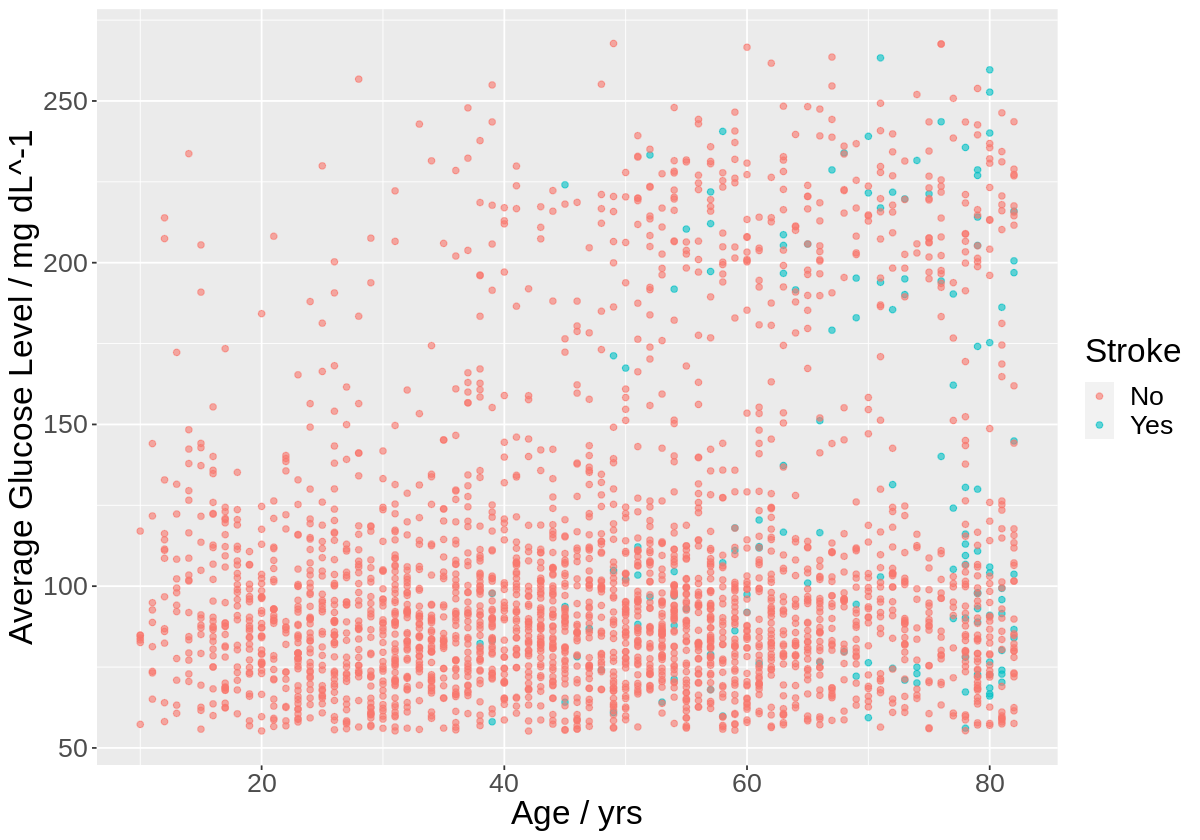

In [17]:
#Create visualization
options(repr.plot.width = 10, repr.plot.height = 7)
stroke_prelim_vis <- stroke_training |> ggplot(aes(x = age, y = avg_glucose_level, color = stroke)) + 
    geom_point(alpha = 0.6) +
    labs(x = "Age / yrs", y = "Average Glucose Level / mg dL^-1", color = "Stroke") +
    theme(text = element_text(size = 20))
stroke_prelim_vis

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



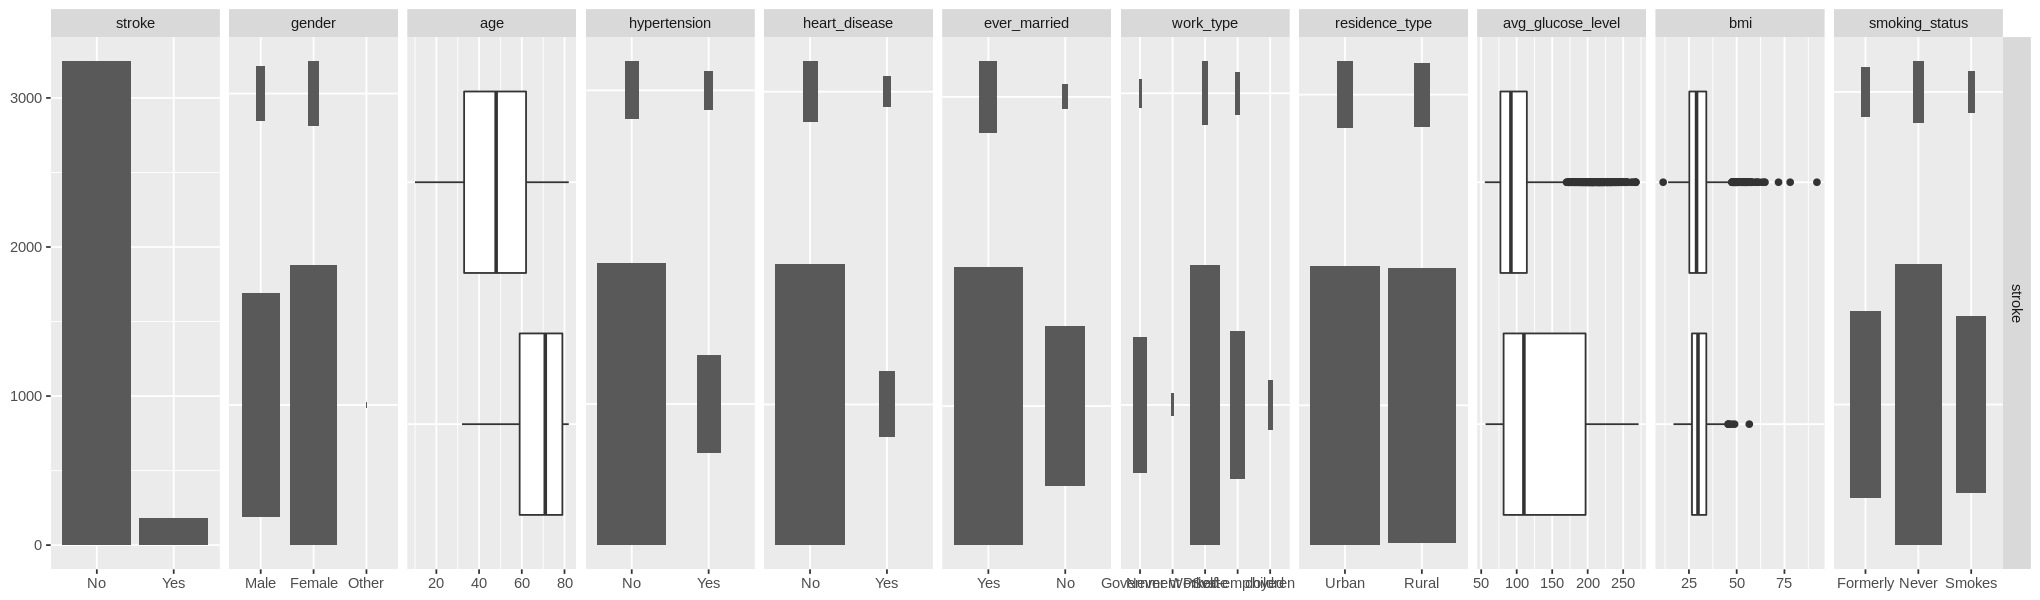

In [14]:
library(GGally)
library(broom)

options(repr.plot.height = 5, repr.plot.width = 17)

pm_pairs <- stroke %>%
  select(stroke, gender:stroke) %>%
  ggpairs()

pm_pairs$nrow <- 1
pm_pairs$yAxisLabels <- pm_pairs$yAxisLabels[1]
print(pm_pairs)

## Preparing Models

# Forward Selection Validation

We are looking to see if `ever_married` and/or `work_type` have a significant influence on the classification

In [15]:
stroke_training <- stroke_training |> select(-id)

In [16]:
names <- colnames(stroke_training |> select(-work_type, -ever_married, -stroke))
base_formula_string <- paste("stroke", "~", paste(names, collapse="+"))
formulas = c(base_formula_string,
             paste(base_formula_string, "+ever_married"),
             paste(base_formula_string, "+work_type"),
             paste(base_formula_string, "+ever_married+work_type"))

In [17]:
stroke_classifier <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")

In [18]:
stroke_vfold <- vfold_cv(stroke_training, v = 5, strata = stroke)

In [19]:
#Create table of accuracies
accs <- data.frame(matrix(ncol = 3, nrow = 0))
x <- c("neighbors", "mean", "model_string")
colnames(accs) <- x
accs <- accs |> mutate(across(neighbors, as.integer)) |> mutate(across(mean, as.double)) |> mutate(across(model_string, as.character))

for (formula in formulas) {
    # create a recipe from the model string
    stroke_recipe <- recipe(as.formula(formula), data = stroke_training) |> 
        step_scale(all_numeric_predictors()) |> 
        step_center(all_numeric_predictors()) |>
        step_dummy(all_nominal_predictors())
    
    # tune the KNN classifier with these predictors, 
    # and collect the accuracy for the best K
    k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))
    acc <- workflow() |>
      add_recipe(stroke_recipe) |>
      add_model(stroke_classifier) |>
      tune_grid(resamples = stroke_vfold, grid = k_vals) |>
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      arrange(desc(mean)) |> head(1) |> 
      select(neighbors, mean) |> 
      mutate(model_string = formula)
    accs <- add_row(accs, acc)
}
accs

neighbors,mean,model_string
<dbl>,<dbl>,<chr>
13,0.7403602,stroke ~ gender+age+hypertension+heart_disease+residence_type+avg_glucose_level+bmi+smoking_status
12,0.7116470,stroke ~ gender+age+hypertension+heart_disease+residence_type+avg_glucose_level+bmi+smoking_status +ever_married
20,0.7013213,stroke ~ gender+age+hypertension+heart_disease+residence_type+avg_glucose_level+bmi+smoking_status +work_type
20,0.6912968,stroke ~ gender+age+hypertension+heart_disease+residence_type+avg_glucose_level+bmi+smoking_status +ever_married+work_type


As seen the variables `ever_married` and `work_type` do not have any effect on the accuracy of the model. This is corroborated by the weak corrolation obtained in the prelimiary corrolation chart. Hence, these variables will be excluded to improve model efficiency. The final model is as follows

In [46]:
stroke_model_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |> set_engine("kknn") |> set_mode("classification")

In [48]:
stroke_recipe <- recipe(stroke ~ gender+age+hypertension+heart_disease+residence_type+avg_glucose_level+bmi+smoking_status, data = stroke_training) |> 
            step_scale(all_numeric_predictors()) |> 
            step_center(all_numeric_predictors()) |>
            step_dummy(all_nominal_predictors())

In [49]:
stroke_fit <- workflow() |> add_model(stroke_model_final) |> add_recipe(stroke_recipe) |> fit(data = stroke_training)

## Evaluating Model Accuracy

In [50]:
stroke_test_predictions <- predict(stroke_fit, stroke_testing) |> bind_cols(stroke_testing)

In [51]:
model_metrics <- stroke_test_predictions |> metrics(truth = stroke, estimate = .pred_class)
model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9446064
kap,binary,0.0000000


As seen from the `accuracy` metric above, the model is able to predict if a person has experienced a stroke with an accuracy of 94.3%. Whilst this is a promising result in attempting to create a model which will predict whether a person will have a stroke, this is no indication that the model generated will be able to **predict** a stroke with a sufficient accuracy.

In [52]:
confusion <- stroke_test_predictions |>
             conf_mat(truth = stroke, estimate = .pred_class)
confusion

          Truth
Prediction  No Yes
       No  648  38
       Yes   0   0

However, upon inspection of the confusion matrix for the model, we discover a flaw. The model seems to be classifying every single case as no stroke. The model may be rewarded when doing so as the percentage of people with a stroke is so low, the penalization is also low. In order to remedy this, we must rectify the model to be more heavily penalized for these Type II errors. Type II errors are the most dangerous as in our desired application would lead to the model stating that the person will not have as stroke whilst in actualality they will, which may lead to a sense of false confidence which decreases their alertness for signs/precursors of stroke. The issue with k-nearest neighbors and heavily imbalanced datasets has been well documented. Efforts were attempted in using a different evaluation metric, such as the F2 score, but similar problems were encountered, most likely due to the heavy imbalance of the dataset.

The following sections are beyond the scope of the course, but it would be interesting to see if another form of classification algorithm would be useful in working with this extremely unbalanced dataset. We will be using the Random Forest algorithm in this case. The following section is adapted from https://juliasilge.com/blog/sf-trees-random-tuning/

In [1]:
install.packages("ranger", dependencies=TRUE)

also installing the dependency ‘RcppEigen’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [18]:
stroke_recipe <- recipe(stroke ~ gender+age+hypertension+heart_disease+residence_type+avg_glucose_level+bmi+smoking_status, data = stroke_training) |> 
            step_dummy(all_nominal_predictors(), -all_outcomes())
stroke_prep <- prep(stroke_recipe)
juiced <- juice(stroke_prep)

In [19]:
forest_model <- rand_forest(mtry = tune(), trees = 1000, min_n = tune()) |> set_engine("ranger") |> set_mode("classification")

In [20]:
forest_tune_workflow <- workflow() |> add_recipe(stroke_recipe) |> add_model(forest_model)

In [24]:
set.seed(1000)
stroke_vfold <- vfold_cv(stroke_training, v = 5, strata = stroke)

In [25]:
tune_results <- tune_grid(forest_tune_workflow, resamples = stroke_vfold, grid = 20)

i Creating pre-processing data to finalize unknown parameter: mtry



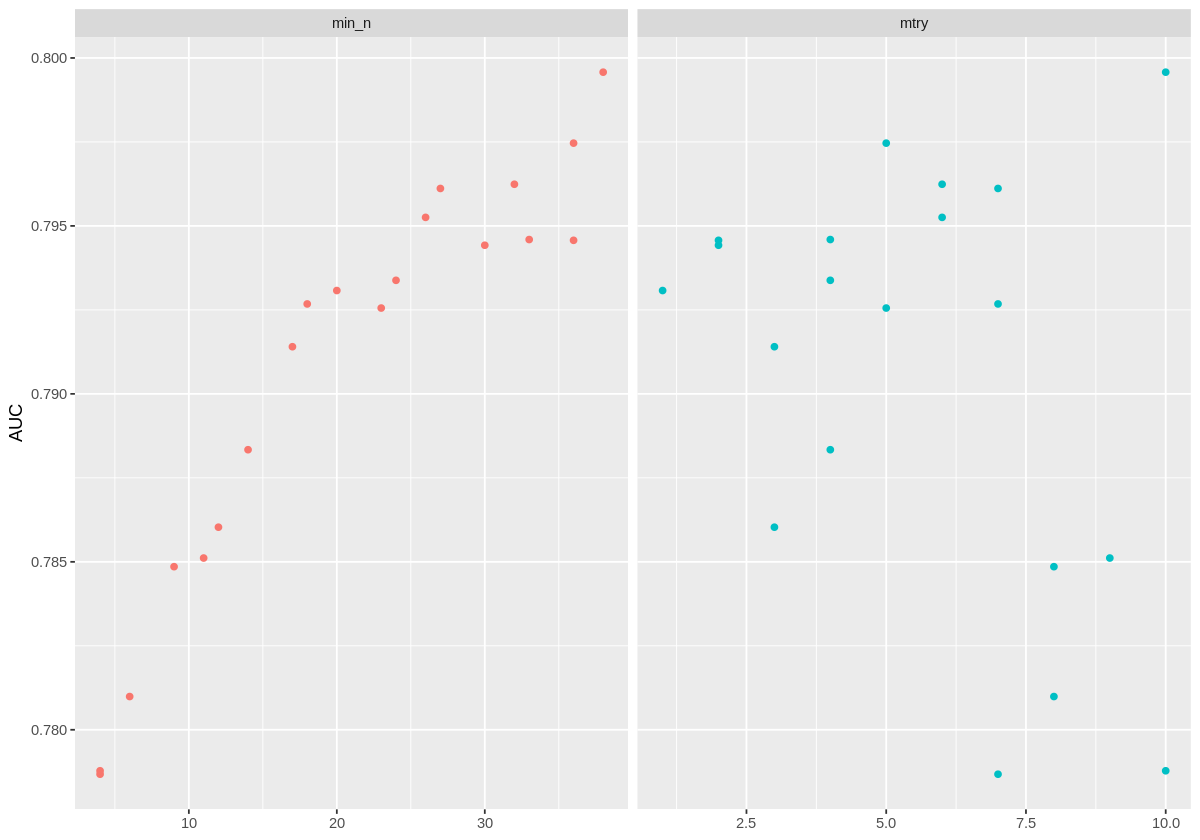

In [28]:
tune_results |>
  collect_metrics() |>
  filter(.metric == "roc_auc") |>
  select(mean, min_n, mtry) |>
  pivot_longer(min_n:mtry,
    values_to = "value",
    names_to = "parameter"
  ) |>
  ggplot(aes(value, mean, color = parameter)) +
  geom_point(show.legend = FALSE) +
  facet_wrap(~parameter, scales = "free_x") +
  labs(x = NULL, y = "AUC")

It seems that the model works well with around 5-10 predictors and with a `min_n` of above 30. We will now try tuning again with these ranges

In [65]:
rf_grid <- grid_regular(
  mtry(range = c(5, 10)),
  min_n(range = c(30, 50)),
  levels = 5
)

regular_res <- tune_grid(
  forest_tune_workflow,
  resamples = stroke_vfold,
  grid = rf_grid
)


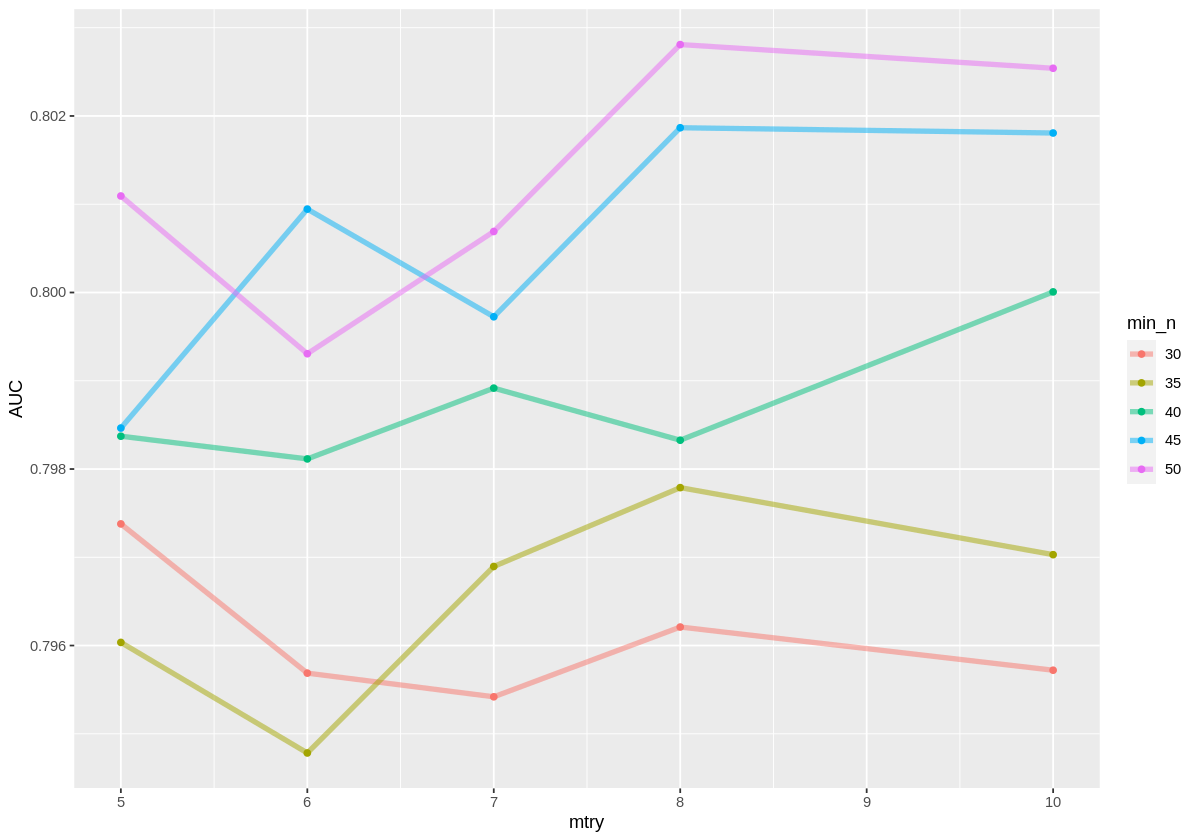

In [66]:
regular_res %>%
  collect_metrics() %>%
  filter(.metric == "roc_auc") %>%
  mutate(min_n = factor(min_n)) %>%
  ggplot(aes(mtry, mean, color = min_n)) +
  geom_line(alpha = 0.5, size = 1.5) +
  geom_point() +
  labs(y = "AUC")

It appears we have hit the upper limit for the improvements to AUC with increasing `min_n` whereby an increase in `min_n` does not result in a significant increase in `AUC`, leading us to the final parameters of `min_n = 45` and `mtry = 10`

In [37]:
best_auc <- select_best(regular_res, "roc_auc")

final_rf <- finalize_model(
  forest_model,
  best_auc
)

final_rf

Random Forest Model Specification (classification)

Main Arguments:
  mtry = 10
  trees = 1000
  min_n = 45

Computational engine: ranger 


In [56]:
final_wf <- workflow() %>%
  add_recipe(stroke_recipe) %>%
  add_model(final_rf)

final_res <- final_wf %>%
  last_fit(stroke_split)

final_res %>%
  collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.9446064,Preprocessor1_Model1
roc_auc,binary,0.7890473,Preprocessor1_Model1


In [67]:
predictions <- final_res |> collect_predictions()

In [68]:
confusion_forest <- predictions |>
             conf_mat(truth = stroke, estimate = .pred_class)
confusion_forest

          Truth
Prediction  No Yes
       No  648  38
       Yes   0   0

Unfortunately, this model also encounters issues similar to to the knn algorithm.